## Linear Discriminant Analysis (Default Dataset)

In [ ]:
if (!require(ISLR)) install.packages("ISLR")
library(ISLR) #load ISLR package which contains datasets "Default"
library(MASS) #load MASS library, which contains lda()

In [ ]:
lda.fit<-lda(default~balance+student,data=Default)
lda.fit

Call:
lda(default ~ balance + student, data = Default)

Prior probabilities of groups:
    No    Yes 
0.9667 0.0333 

Group means:
      balance studentYes
No   803.9438  0.2914037
Yes 1747.8217  0.3813814

Coefficients of linear discriminants:
                    LD1
balance     0.002244397
studentYes -0.249059498

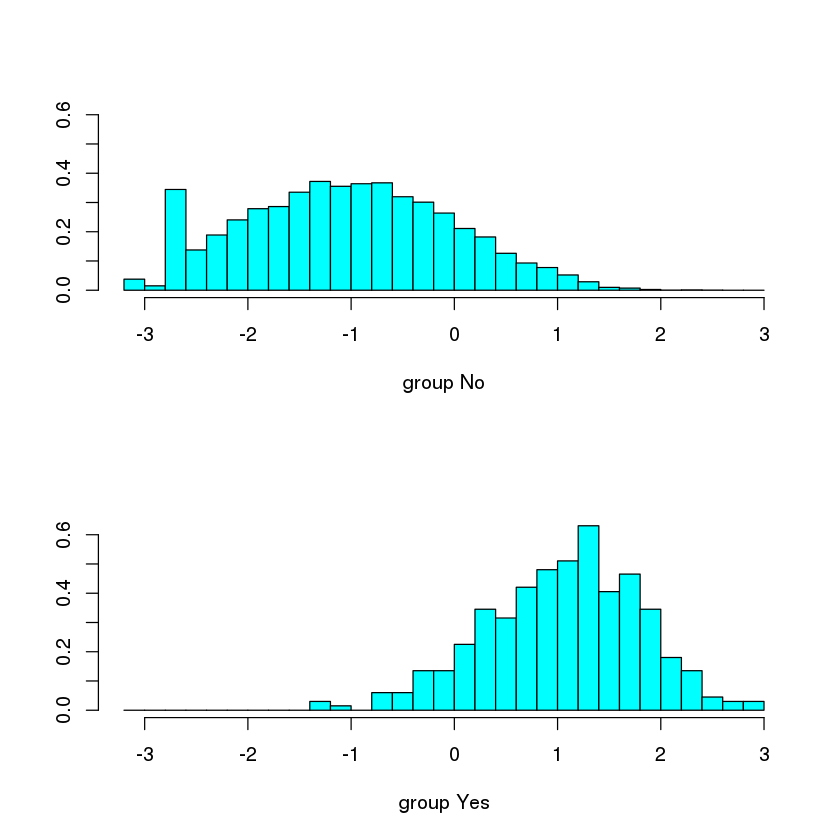

In [ ]:
plot(lda.fit) #plots the linear discriminant for each of the training observations

Plot the Balance and Student, conditional on Default. Note that "Student==True" is coded as a "2", while "Student==False" is coded as a "1".

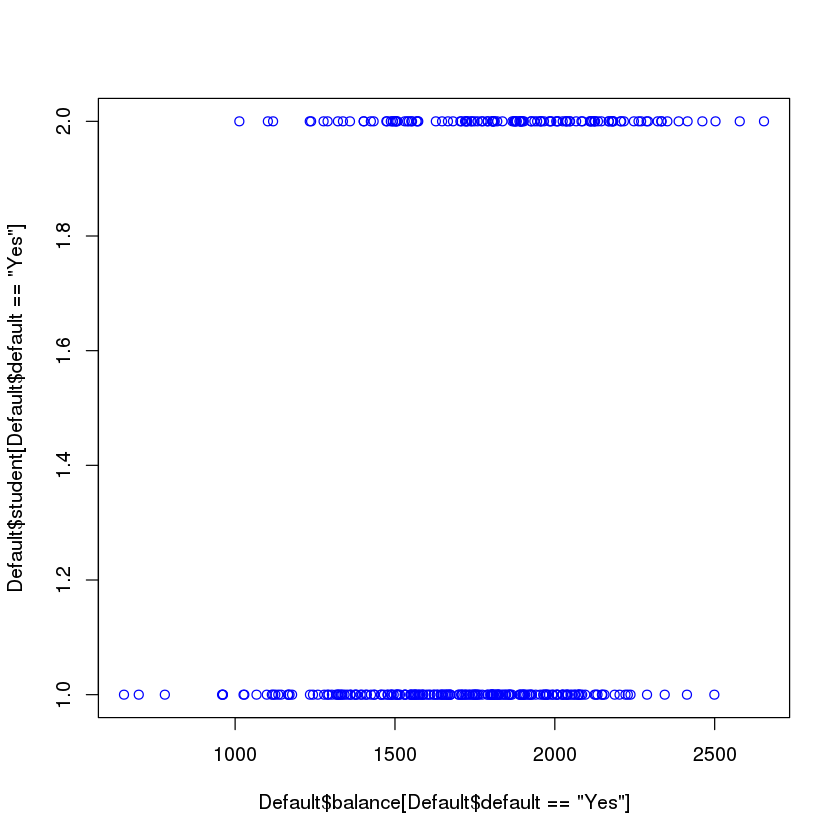

In [ ]:
plot(Default$balance[Default$default=="Yes"],Default$student[Default$default=="Yes"],col="blue")

Plot the Balance and Student, conditional on Not Default

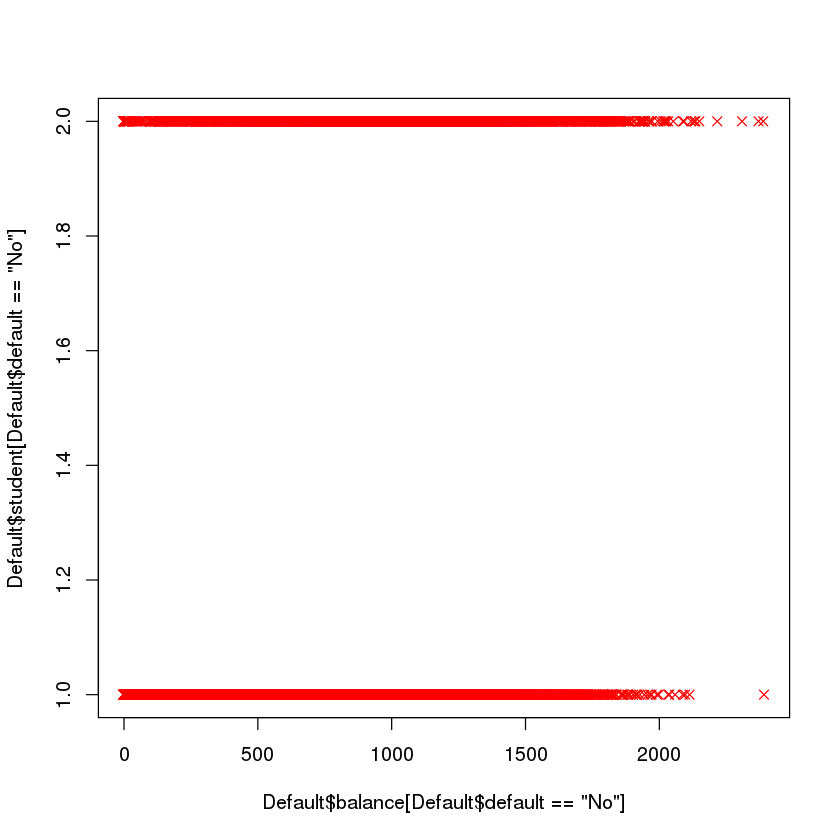

In [ ]:
plot(Default$balance[Default$default=="No"],Default$student[Default$default=="No"],col="red",pch=4)

In [ ]:
lda.pred = predict(lda.fit)
names(lda.pred)
lda.class=lda.pred$class # store predicted class
obs.class=Default$default #store observed class

[1] "class"     "posterior" "x"

We can plot the predicted score against the actual defaults observed. Not that score is higher when we observe defaults.

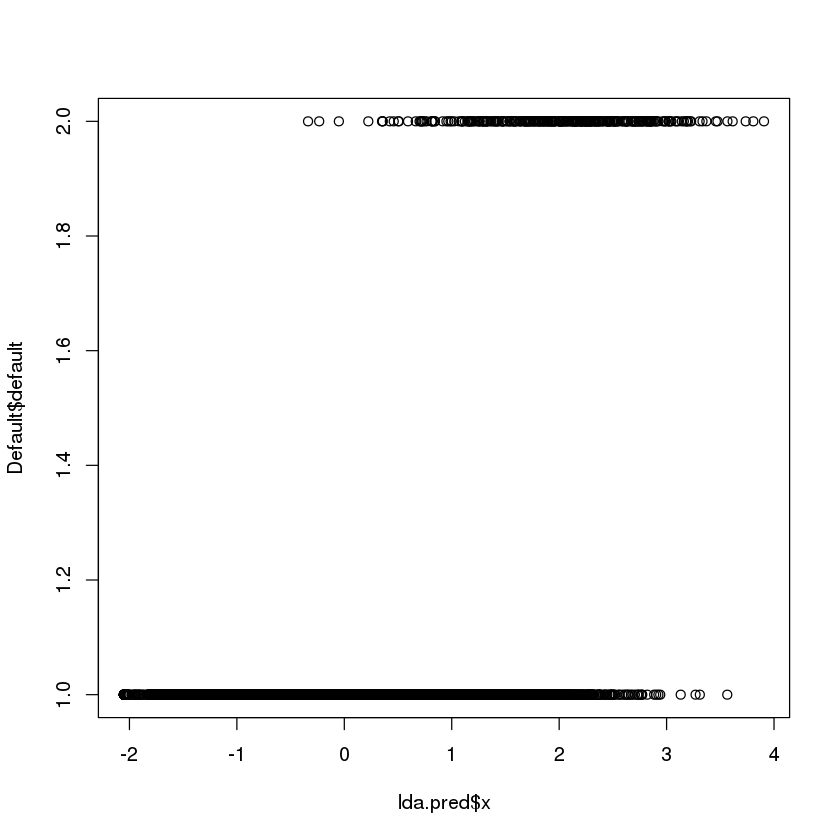

In [ ]:
plot(lda.pred$x,Default$default)

Note that this plot is simliar to the histrogram above from plot(lda.fit)

### Hit Rate

In [ ]:
mean(lda.class == obs.class)

[1] 0.9725

### Error Rate

In [ ]:
1-mean(lda.class == obs.class)

[1] 0.0275

Though this seems low, there ar two caveats:

1) in-sample. (i.e. not test rate).

2) the number of defaults was low (3.3%). So even a simple (useless) classifier that always predicted no defaults would fit this data relatively well.

### Confusion Matrix

In [ ]:
table(lda.class,obs.class)

         obs.class
lda.class   No  Yes
      No  9644  252
      Yes   23   81